In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

Chapter 7 n-step Bootstrapping
=================

MC <-- n-step TD --> one-step TD

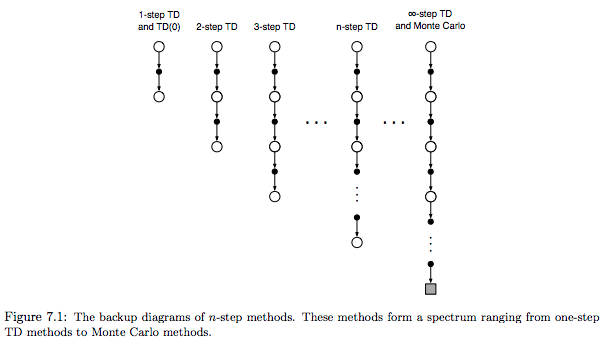

In [3]:
Image('./res/fig7_1.png')

Monte Carlo return:

$G_t \doteq R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots + \gamma^{T-t-1} R_T$

one-step return:

$G_{t:t+1} \doteq R_{t+1} + \gamma V_t(S_{t+1})$

two-step return:

$G_{t:t+2} \doteq R_{t+1} + \gamma R_{t+2} + \gamma^2 V_{t+1}(S_{t+2})$

n-step return:

$G_{t:t+n} \doteq R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1}(S_{t+n})$

The natural state-value learning algorithm for using n-step returns is thus:

$V_{t+n}(S_t) \doteq V_{t+n-1}(S_t) + \alpha \left [ G_{t:t+n} - V_{t+n-1}(S_t) \right ]$

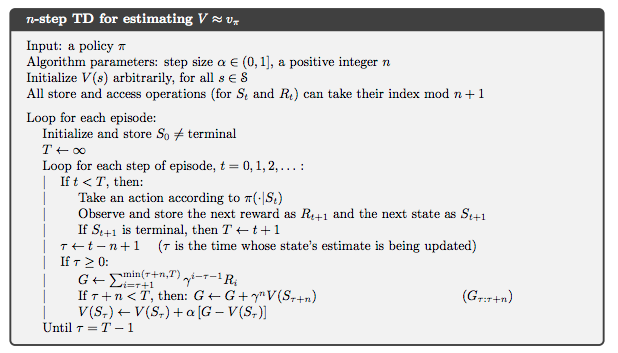

In [4]:
Image('./res/n_step_predict.png')

error reduction property of n-step returns: their expectation is guaranteed to be a better estimate of $v_\pi$ than $V_{t+n-1}$ is, in a worst-state sense:

$\max_s \left | \mathbb{E}_\pi [G_{t:t+n} \mid S_t = s] - v_\pi(s) \right | \leq \gamma^n \max_s \left | V_{t+n-1}(s) - v_\pi(s) \right |$

### 7.2 n-step Sarsa

The main idea is to simply switch states for actions (state-action pairs) and then use an $\epsilon$-greedy policy.

$Q_{t+n}(S_t, A_t) \doteq Q_{t+n-1}(S_t, A_t) + \alpha [G_{t:t+n} - Q_{t+n-1}(S_t, A_t)] \quad \text{ , $0 \leq t < T$}$

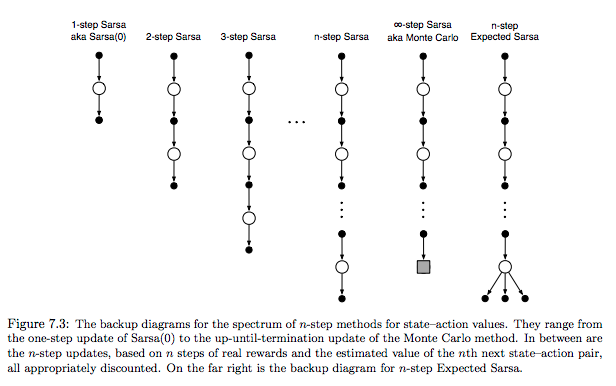

In [5]:
Image('./res/fig7_3.png')

Expected Sarsa (like n-step sarsa):

\begin{align}
    G_{t:t+n} & \doteq R_{t+1} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n \bar{V}_{t+n-1}(S_{t+n}) \qquad t + n < T \\
    \bar{V}_t(s) & \doteq \sum_a \pi(a \mid s) Q_t(s, a) \qquad \text{for all $s \in \mathcal{S}$}
\end{align}

### 7.3 n-step Off-policy Learning by Importance Sampling

simply be weighted by $\rho_{t:t+n-1}$, importance sampling ratio:

\begin{align}
    V_{t+n}(S_t) & \doteq V_{t+n-1}(S_t) + \alpha \rho_{t:t+n-1} [G_{t:t+n} - V_{t+n-1}(S_t)] \qquad 0 \leq t < T \\
    \rho_{t:h} & \doteq \prod_{k=t}^{\min(h, T-1)} \frac{\pi(A_k \mid S_k)}{b(A_k \mid S_k)} \\
    Q_{t+n}(S_t, A_t) & \doteq Q_{t+n-1}(S_t, A_t) + \alpha \rho_{t+1:t+n-1} [G_{t:t+n} - Q_{t+n-1}(S_t, A_t)] \quad \text{ , $0 \leq t < T$}
\end{align}

### 7.4 Per-decision Off-policy Methods with Control Variates

### 7.5 Off-policy Learning Without Importance Sampling: The n-step Tree Backup Algorithm

Tree-backup algorithm:

In the tree-backup update, the target includes all these things plus the estimated values of the dangling action nodes hanging off the sides, at all levels.

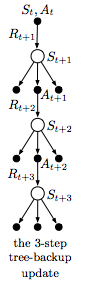

In [6]:
Image('./res/tree_update.png')

### 7.6 A Unifying Algorithm: n-step $Q(\sigma)$

dicide on a step-by-step basis whether one wanted to take the action as a sample (as in Sarsa), or consider the expectation over all actions instead (as in the tree-backup update).

Let $\sigma(t) \in [0, 1]$ denote the degree of sampling on step $t$, with $\sigma = 1$ denoting full sampling and $\sigma = 0$ denoting a pure expectation with no sampling. We call this proposed new algorithm n-step $Q(\sigma)$.

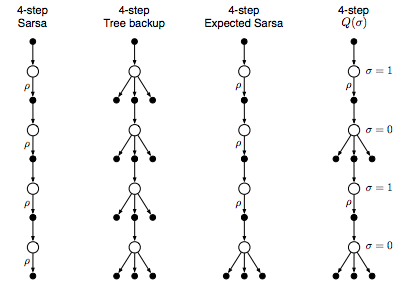

In [7]:
Image('./res/fig7_5.png')